## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.stats import kstest
pd.options.display.max_columns = 1000

In [3]:
flights_sample = pd.read_csv('../samples/flights_sample.csv', sep=';', low_memory=False).drop(labels=['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
flights_sample.drop(columns=['no_name', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime'], inplace=True)
# flights_sample.info()

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

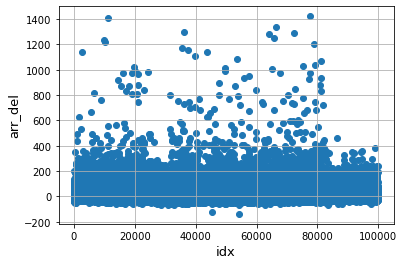

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = flights_sample.index, y = flights_sample['arr_delay'])
plt.ylabel('arr_del', fontsize=13)
plt.xlabel('idx', fontsize=13)
plt.grid()
plt.show()

##### arr_del above 400 and below -100 are few. Outliers?

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01,
        1.6800e+02, 3.2960e+03, 2.4327e+04, 3.8906e+04, 1.4143e+04,
        6.0710e+03, 3.2280e+03, 1.9150e+03, 1.3580e+03, 9.5800e+02,
        7.7700e+02, 5.9100e+02, 4.5100e+02, 3.4500e+02, 2.6000e+02,
        2.2700e+02, 1.7000e+02, 1.3300e+02, 1.1900e+02, 7.7000e+01,
        7.5000e+01, 4.5000e+01, 5.2000e+01, 4.3000e+01, 3.5000e+01,
        3.5000e+01, 3.0000e+01, 1.4000e+01, 1.6000e+01, 1.4000e+01,
        1.0000e+01, 1.4000e+01, 9.0000e+00, 1.0000e+01, 2.0000e+00,
        1.0000e+01, 6.0000e+00, 6.0000e+00, 3.0000e+00, 3.0000e+00,
        6.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00,
        4.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        5.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 5.0000e+00, 2.0000e+00, 2.00

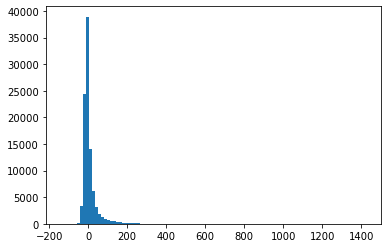

In [5]:
plt.hist(flights_sample['arr_delay'].dropna(), bins=100)

In [6]:
print(f"Mean: {flights_sample['arr_delay'].mean()}\nMedian: {flights_sample['arr_delay'].median()}\nMode: {flights_sample['arr_delay'].mode()}")

Mean: 5.557749179090779
Median: -6.0
Mode: 0   -8.0
dtype: float64


In [7]:
from scipy.stats import kstest
kstest(flights_sample['arr_delay'].dropna(), 'norm')

KstestResult(statistic=0.5845697269166206, pvalue=0.0)

##### Unedited arrival times do not follow a normal distribution or have a mean of 0. positive skew with mean=5.56
##### Will remove outliers and check again

##### Method-1: visual detection of outliers

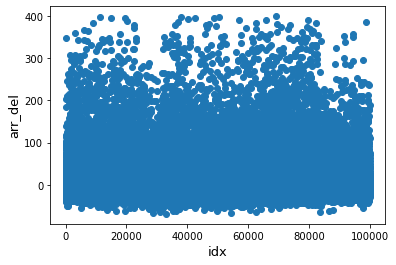

In [8]:
# arrival delays greater than 600 or lower than -100 appear to be outliers
flights_sample_vis_cleaned = flights_sample.loc[((flights_sample['arr_delay'] < 400) & (flights_sample['arr_delay'] > -100))]

fig, ax = plt.subplots()
ax.scatter(x = flights_sample_vis_cleaned.index, y = flights_sample_vis_cleaned['arr_delay'])
plt.ylabel('arr_del', fontsize=13)
plt.xlabel('idx', fontsize=13)
plt.show()

In [9]:
flights_sample_arr_delay_vis_outliers = flights_sample.loc[((flights_sample['arr_delay'] > 400) | 
                                                            (flights_sample['arr_delay'] < -100))
                                                          ]

flights_sample_arr_delay_vis_outlier_comparison = pd.concat([flights_sample_arr_delay_vis_outliers['mkt_unique_carrier'].groupby(by=flights_sample_arr_delay_vis_outliers['mkt_unique_carrier']).count(),
                                                             flights_sample_vis_cleaned['mkt_unique_carrier'].groupby(by=flights_sample['mkt_unique_carrier']).count()],
                                                             axis=1
                                                           )


flights_sample_arr_delay_vis_outlier_comparison.columns = ['# of Outliers', '# in Original']
flights_sample_arr_delay_vis_outlier_comparison['Outlier Percentage'] = (flights_sample_arr_delay_vis_outlier_comparison['# of Outliers'] / flights_sample_arr_delay_vis_outlier_comparison['# in Original']) * 100
flights_sample_arr_delay_vis_outlier_comparison

,# of Outliers,# in Original,Outlier Percentage
AA,49.0,25229,0.194221
AS,1.0,5271,0.018972
B6,8.0,3698,0.216333
DL,48.0,21637,0.221842
F9,2.0,1617,0.123686
G4,4.0,1209,0.330852
HA,1.0,1145,0.087336
NK,10.0,2356,0.424448
UA,52.0,18939,0.274566
WN,1.0,16671,0.005998


(array([3.0000e+00, 1.2000e+01, 1.6000e+01, 3.2000e+01, 8.7000e+01,
        2.3300e+02, 4.4500e+02, 1.2920e+03, 2.7020e+03, 4.2140e+03,
        8.8210e+03, 1.2725e+04, 1.1475e+04, 1.3119e+04, 9.9020e+03,
        5.7700e+03, 5.2330e+03, 3.6330e+03, 2.1550e+03, 2.1310e+03,
        1.7780e+03, 1.1450e+03, 1.2080e+03, 1.0610e+03, 6.4600e+02,
        7.8700e+02, 6.6800e+02, 5.5800e+02, 4.1900e+02, 4.5500e+02,
        3.8800e+02, 3.1100e+02, 3.7500e+02, 3.1100e+02, 2.1900e+02,
        2.7400e+02, 2.2000e+02, 1.9400e+02, 2.3000e+02, 2.0200e+02,
        1.4100e+02, 1.6000e+02, 1.6600e+02, 1.1600e+02, 1.4300e+02,
        1.1700e+02, 7.9000e+01, 1.1300e+02, 9.8000e+01, 7.6000e+01,
        8.4000e+01, 7.8000e+01, 8.1000e+01, 5.7000e+01, 5.7000e+01,
        6.6000e+01, 3.3000e+01, 5.7000e+01, 4.5000e+01, 4.3000e+01,
        5.0000e+01, 3.7000e+01, 3.7000e+01, 3.7000e+01, 2.7000e+01,
        2.6000e+01, 2.5000e+01, 2.3000e+01, 1.8000e+01, 2.3000e+01,
        2.8000e+01, 1.7000e+01, 1.4000e+01, 1.40

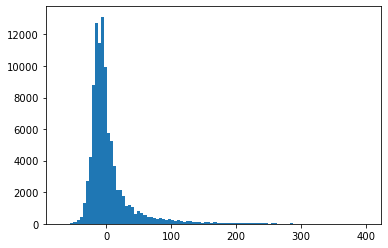

In [10]:
plt.hist(flights_sample_vis_cleaned['arr_delay'], bins=100)

In [11]:
print(f"Mean: {flights_sample_vis_cleaned['arr_delay'].mean()}\nMedian: {flights_sample_vis_cleaned['arr_delay'].median()}\nMode: {flights_sample_vis_cleaned['arr_delay'].mode()}")

Mean: 4.354814322929969
Median: -6.0
Mode: 0   -8.0
dtype: float64


In [12]:
from scipy.stats import kstest
kstest(flights_sample_vis_cleaned['arr_delay'].dropna(), 'norm')

KstestResult(statistic=0.5856474774914694, pvalue=0.0)

##### Even with outliers removed, this distribution is not normal. It is still positively skewed

##### Method-2: using IQR to  detect and remove outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x29d57eae0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29d57eae790>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d57e9ed30>],
 'medians': [<matplotlib.lines.Line2D at 0x29d57eaee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x29d57eb7190>],
 'means': []}

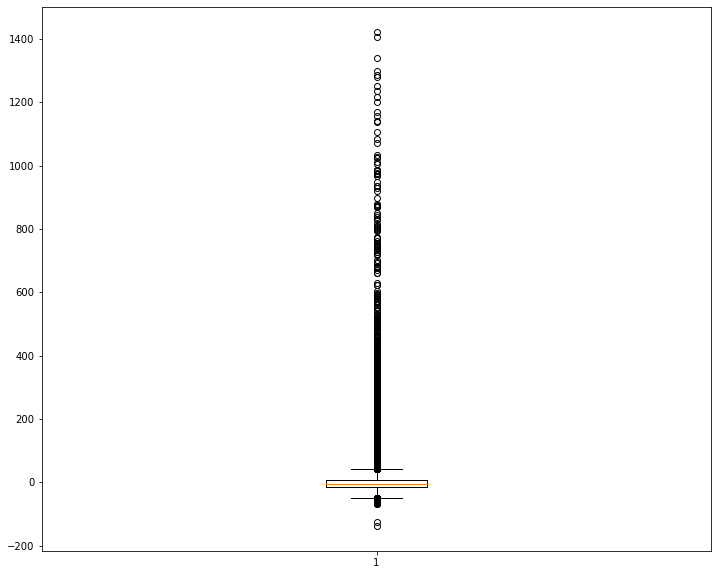

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
plt.boxplot(flights_sample['arr_delay'].dropna())

In [15]:
flights_sample_arr_delay_iqr = flights_sample['arr_delay'].quantile(0.75) - flights_sample['arr_delay'].quantile(0.25)

flights_sample_arr_delay_iqr_outliers = flights_sample.loc[((flights_sample['arr_delay'] > flights_sample['arr_delay'].quantile(0.75) + (1.5 * flights_sample_arr_delay_iqr)) | 
                                                            (flights_sample['arr_delay'] < flights_sample['arr_delay'].quantile(0.25) - (1.5 * flights_sample_arr_delay_iqr)))]

In [16]:
flights_sample['mkt_unique_carrier'].groupby(by=flights_sample['mkt_unique_carrier']).count()

mkt_unique_carrier
AA    25986
AS     5360
B6     3757
DL    21893
F9     1650
G4     1218
HA     1153
NK     2405
UA    19419
VX      116
WN    17039
Name: mkt_unique_carrier, dtype: int64

In [17]:
flights_sample_arr_delay_iqr_outlier_comparison = pd.concat([flights_sample_arr_delay_iqr_outliers['mkt_unique_carrier'].groupby(by=flights_sample_arr_delay_iqr_outliers['mkt_unique_carrier']).count(),
                                                             flights_sample['mkt_unique_carrier'].groupby(by=flights_sample['mkt_unique_carrier']).count()],
                                                             axis=1)


flights_sample_arr_delay_iqr_outlier_comparison.columns = ['# of Outliers', '# in Original']
flights_sample_arr_delay_iqr_outlier_comparison['Percentage'] = (flights_sample_arr_delay_iqr_outlier_comparison['# of Outliers'] / flights_sample_arr_delay_iqr_outlier_comparison['# in Original']) * 100
flights_sample_arr_delay_iqr_outlier_comparison
#reduce threshold for outliers (want to remove the least amount of datapoints as possible)

,# of Outliers,# in Original,Percentage
mkt_unique_carrier,,,
AA,2552,25986,9.820673
AS,339,5360,6.324627
B6,545,3757,14.506255
DL,1675,21893,7.650847
F9,242,1650,14.666667
G4,118,1218,9.688013
HA,32,1153,2.775369
NK,238,2405,9.896050
UA,2188,19419,11.267316


In [18]:
#1.5 IQR is too strict (dropping too many rows), will increase to 4.0 and check again
flights_sample_arr_delay_iqr = flights_sample['arr_delay'].quantile(0.75) - flights_sample['arr_delay'].quantile(0.25)

whiskers = 4
hi_threshold = flights_sample['arr_delay'].quantile(0.75) + (whiskers * flights_sample_arr_delay_iqr)
lo_threshold = flights_sample['arr_delay'].quantile(0.25) - (whiskers * flights_sample_arr_delay_iqr)

flights_sample_arr_delay_iqr_outliers = flights_sample.loc[((flights_sample['arr_delay'] > hi_threshold) | 
                                                            (flights_sample['arr_delay'] < lo_threshold))
                                                          ]

flights_sample_arr_delay_iqr_outlier_comparison = pd.concat([flights_sample_arr_delay_iqr_outliers['mkt_unique_carrier'].groupby(by=flights_sample_arr_delay_iqr_outliers['mkt_unique_carrier']).count(),
                                               flights_sample['mkt_unique_carrier'].groupby(by=flights_sample['mkt_unique_carrier']).count()],
                                               axis=1)


flights_sample_arr_delay_iqr_outlier_comparison.columns = ['# of Outliers', '# in Original']
flights_sample_arr_delay_iqr_outlier_comparison['Percentage'] = (flights_sample_arr_delay_iqr_outlier_comparison['# of Outliers'] / flights_sample_arr_delay_iqr_outlier_comparison['# in Original']) * 100
flights_sample_arr_delay_iqr_outlier_comparison['Hi Threshold'] = hi_threshold
flights_sample_arr_delay_iqr_outlier_comparison

,# of Outliers,# in Original,Percentage,Hi Threshold
mkt_unique_carrier,,,,
AA,983,25986,3.782806,100.0
AS,82,5360,1.529851,100.0
B6,205,3757,5.456481,100.0
DL,665,21893,3.037501,100.0
F9,86,1650,5.212121,100.0
G4,47,1218,3.858785,100.0
HA,8,1153,0.693842,100.0
NK,94,2405,3.908524,100.0
UA,893,19419,4.598589,100.0


In [19]:
len(flights_sample_arr_delay_iqr_outliers)/len(flights_sample)

0.034191367654706185

In [20]:
flights_sample_iqr_cleaned = flights_sample.drop(index=flights_sample_arr_delay_iqr_outliers.index)

In [21]:
1 - len(flights_sample_iqr_cleaned)/len(flights_sample)

0.034191367654706206

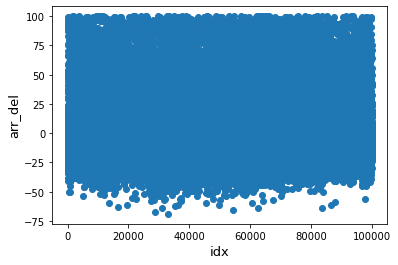

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = flights_sample_iqr_cleaned.index, y = flights_sample_iqr_cleaned['arr_delay'])
plt.ylabel('arr_del', fontsize=13)
plt.xlabel('idx', fontsize=13)
plt.show()

(array([1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 1.000e+01, 1.000e+01, 6.000e+00, 1.800e+01, 3.400e+01,
        1.500e+01, 3.800e+01, 6.900e+01, 9.600e+01, 6.800e+01, 1.920e+02,
        2.530e+02, 1.750e+02, 4.670e+02, 6.500e+02, 3.970e+02, 9.590e+02,
        1.346e+03, 9.060e+02, 2.027e+03, 2.671e+03, 3.327e+03, 1.982e+03,
        4.324e+03, 5.065e+03, 2.679e+03, 5.665e+03, 5.731e+03, 2.858e+03,
        5.563e+03, 5.145e+03, 2.411e+03, 4.377e+03, 3.846e+03, 1.679e+03,
        3.121e+03, 2.649e+03, 2.383e+03, 9.740e+02, 1.876e+03, 1.530e+03,
        7.340e+02, 1.369e+03, 1.138e+03, 5.550e+02, 9.350e+02, 8.830e+02,
        3.890e+02, 7.590e+02, 7.000e+02, 7.050e+02, 2.790e+02, 5.840e+02,
        5.340e+02, 2.620e+02, 4.810e+02, 4.330e+02, 2.220e+02, 4.210e+02,
        3.680e+02, 1.720e+02, 3.040e+02, 3.130e+02, 1.590e+02, 3.150e+02,
        3.030e+02, 2.520e+02, 1.130e+02, 2.370e+02, 2.230e+02, 9.800e+01,
        2.150e+02, 2.040e+02, 9.500e+0

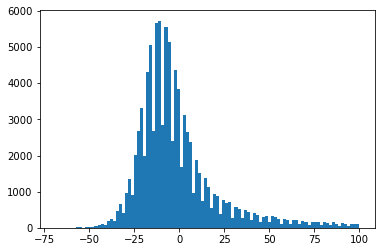

In [23]:
plt.hist(flights_sample_iqr_cleaned['arr_delay'].dropna(), bins=100)

In [24]:
print(f"Mean: {flights_sample_iqr_cleaned['arr_delay'].mean()}\nMedian: {flights_sample_iqr_cleaned['arr_delay'].median()}\nMode: {flights_sample_iqr_cleaned['arr_delay'].mode()}")

Mean: -1.1806367084728928
Median: -7.0
Mode: 0   -8.0
dtype: float64


In [25]:
kstest(flights_sample_iqr_cleaned['arr_delay'].dropna(), 'norm')

KstestResult(statistic=0.6064881635411861, pvalue=0.0)

##### Arrival Delay follows a positively skewed distribution with a mean != 0 (find median and mode)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [26]:
flights_sample.head(1)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-05-22,AA,AA,AA,1146,AA,N921AN,1146,11433,DTW,"Detroit, MI",11298,DFW,"Dallas/Fort Worth, TX",1140,1152.0,12.0,18.0,1210.0,1339.0,16.0,1333,1355.0,22.0,0,NaN,0,N,173.0,183.0,149.0,1,986,6.0,0.0,10.0,0.0,6.0


In [27]:
flights_sample['fl_date'] = pd.to_datetime(flights_sample['fl_date'].astype(str), format='%Y-%m-%d')

<BarContainer object of 8 artists>

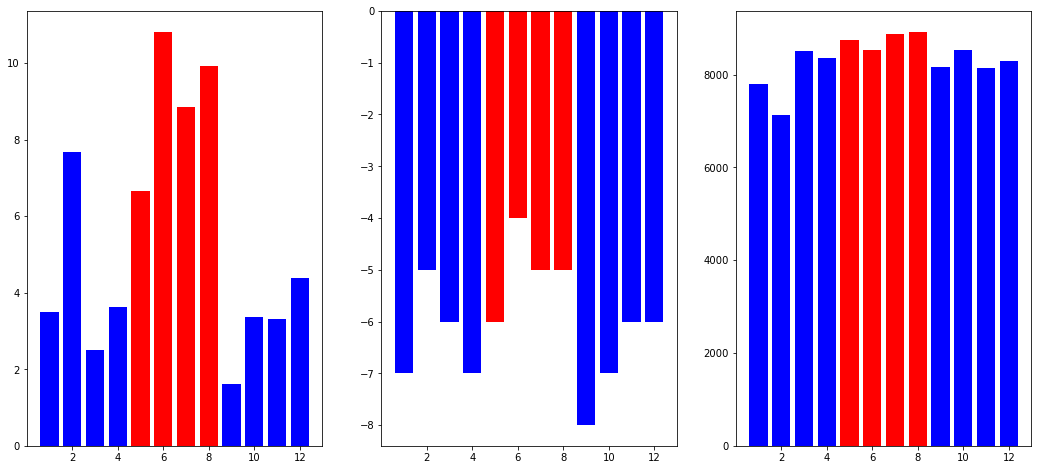

In [28]:
flights_sample_avg_monthly_delay = flights_sample.groupby(by=[flights_sample['fl_date'].dt.month]).mean()['arr_delay']
flights_sample_med_monthly_delay = flights_sample.groupby(by=[flights_sample['fl_date'].dt.month]).median()['arr_delay']
flights_sample_monthly_flights = flights_sample.groupby(by=[flights_sample['fl_date'].dt.month]).sum()['flights']

mask1 = (flights_sample_avg_monthly_delay.index > 4) & (flights_sample_avg_monthly_delay.index < 9)
mask2 = (flights_sample_avg_monthly_delay.index <= 4) | (flights_sample_avg_monthly_delay.index >= 9)

mask3 = (flights_sample_med_monthly_delay.index > 4) & (flights_sample_med_monthly_delay.index < 9)
mask4 = (flights_sample_med_monthly_delay.index <= 4) | (flights_sample_med_monthly_delay.index >= 9)

mask5 = (flights_sample_monthly_flights.index > 4) & (flights_sample_monthly_flights.index < 9)
mask6 = (flights_sample_monthly_flights.index <= 4) | (flights_sample_monthly_flights.index >= 9)

plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.bar(flights_sample_avg_monthly_delay.index[mask1], flights_sample_avg_monthly_delay.values[mask1], color='red')
plt.bar(flights_sample_avg_monthly_delay.index[mask2], flights_sample_avg_monthly_delay.values[mask2], color='blue')

plt.subplot(1,3,2)
plt.bar(flights_sample_med_monthly_delay.index[mask3], flights_sample_med_monthly_delay.values[mask3], color='red')
plt.bar(flights_sample_med_monthly_delay.index[mask4], flights_sample_med_monthly_delay.values[mask4], color='blue')

plt.subplot(1,3,3)
plt.bar(flights_sample_monthly_flights.index[mask5], flights_sample_monthly_flights.values[mask5], color='red')
plt.bar(flights_sample_monthly_flights.index[mask6], flights_sample_monthly_flights.values[mask6], color='blue')

##### Check again after removing outliers

<BarContainer object of 8 artists>

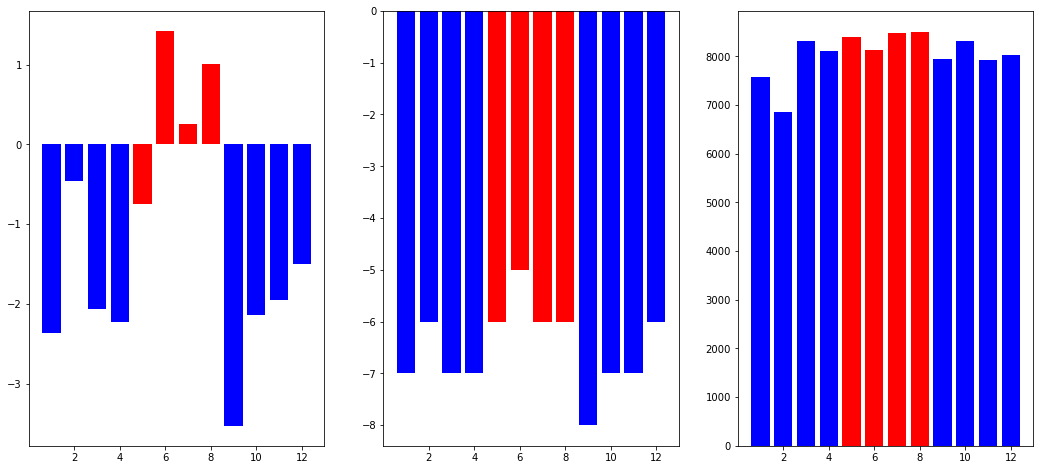

In [29]:
flights_sample_iqr_cleaned['fl_date'] = pd.to_datetime(flights_sample_iqr_cleaned['fl_date'].astype(str), format='%Y-%m-%d')

flights_sample_iqr_cleaned_avg_monthly_delay = flights_sample_iqr_cleaned.groupby(by=[flights_sample_iqr_cleaned['fl_date'].dt.month]).mean()['arr_delay']
flights_sample_iqr_cleaned_med_monthly_delay = flights_sample_iqr_cleaned.groupby(by=[flights_sample_iqr_cleaned['fl_date'].dt.month]).median()['arr_delay']
flights_sample_iqr_cleaned_monthly_flights = flights_sample_iqr_cleaned.groupby(by=[flights_sample_iqr_cleaned['fl_date'].dt.month]).sum()['flights']

mask1 = (flights_sample_iqr_cleaned_avg_monthly_delay.index > 4) & (flights_sample_iqr_cleaned_avg_monthly_delay.index < 9)
mask2 = (flights_sample_iqr_cleaned_avg_monthly_delay.index <= 4) | (flights_sample_iqr_cleaned_avg_monthly_delay.index >= 9)

mask3 = (flights_sample_iqr_cleaned_med_monthly_delay.index > 4) & (flights_sample_iqr_cleaned_med_monthly_delay.index < 9)
mask4 = (flights_sample_iqr_cleaned_med_monthly_delay.index <= 4) | (flights_sample_iqr_cleaned_med_monthly_delay.index >= 9)

mask5 = (flights_sample_iqr_cleaned_monthly_flights.index > 4) & (flights_sample_iqr_cleaned_monthly_flights.index < 9)
mask6 = (flights_sample_iqr_cleaned_monthly_flights.index <= 4) | (flights_sample_iqr_cleaned_monthly_flights.index >= 9)

plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.bar(flights_sample_iqr_cleaned_avg_monthly_delay.index[mask1], flights_sample_iqr_cleaned_avg_monthly_delay.values[mask1], color='red')
plt.bar(flights_sample_iqr_cleaned_avg_monthly_delay.index[mask2], flights_sample_iqr_cleaned_avg_monthly_delay.values[mask2], color='blue')

plt.subplot(1,3,2)
plt.bar(flights_sample_iqr_cleaned_med_monthly_delay.index[mask3], flights_sample_iqr_cleaned_med_monthly_delay.values[mask3], color='red')
plt.bar(flights_sample_iqr_cleaned_med_monthly_delay.index[mask4], flights_sample_iqr_cleaned_med_monthly_delay.values[mask4], color='blue')

plt.subplot(1,3,3)
plt.bar(flights_sample_iqr_cleaned_monthly_flights.index[mask5], flights_sample_iqr_cleaned_monthly_flights.values[mask5], color='red')
plt.bar(flights_sample_iqr_cleaned_monthly_flights.index[mask6], flights_sample_iqr_cleaned_monthly_flights.values[mask6], color='blue')

##### The summer months (5-8 or May-Aug) have longer average delays than other months. This is likely due mostly to weather. 
- Summer months are much hotter:
    - Storms will ground flights
    - fog requires planes to space out more during taxi, landing, and takeoff. This will cause flights to take longer to go from gate to gate, which will incur delays
    - weather could also cause flights to re-route, also causing delays
- The ambient temperature could potentially cause technical problems on the aircraft that will need to be resolved before takeoff
    - there is likely an increased amount of checks performed in the summer (i.e brake temp)
- There are slightly more flights during these months than others. With more flights and the fact that a single delay can have a cascading effect, this is likely a contributer to the higher average delays for these motnhs

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [30]:
from sklearn.model_selection import train_test_split
weather_sample_source, _ = train_test_split(flights_sample, train_size=200)

In [31]:
weather_sample = weather_sample_source.loc[:, ['fl_date', 'crs_arr_time', 'dest_city_name', 'arr_delay']]
weather_sample.reset_index(inplace=True)
weather_sample.drop(columns='index', inplace=True)
weather_sample.fillna(0, inplace=True)
weather_sample

,fl_date,crs_arr_time,dest_city_name,arr_delay
0,2019-11-19,1938,"Seattle, WA",-33.0
1,2018-05-20,1650,"Myrtle Beach, SC",-9.0
2,2018-10-04,859,"Denver, CO",-21.0
3,2018-04-10,1641,"Tulsa, OK",7.0
4,2018-11-08,852,"Omaha, NE",-20.0
...,...,...,...,...
195,2019-07-17,823,"Chicago, IL",-9.0
196,2018-11-14,2340,"Knoxville, TN",7.0
197,2018-02-14,1355,"Los Angeles, CA",-16.0
198,2019-03-24,920,"Des Moines, IA",-29.0


In [32]:
#weather code definitions from wwo.com
weather_codes = {'snowing': ['395', '392', '371', '368', '338', '335', '332', '329', '326', '323', '230', '227', '179'], 
                 'raining': ['389', '386', '377', '374', '365', '362', '359', '356', '353', '350', '320', '317', '314', '311', '308', '305', '302', '299', '296', '293', '284', '281', '266', '263', '200', '185', '182', '176', '143'],
                 'cloudy': ['260', '248', '122', '119', '116']
                }

In [33]:
import requests as re

sunny, cloudy, raining, snowing = [], [], [], [] #empty lists to store weather bools

for row in range(len(weather_sample)): #iterate through every row
    location = weather_sample.iloc[row, 2].strip() #the location to check is the city name of the row
    date = weather_sample.iloc[row, 0] #the date of the row
    url = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=86af8eadab3b4477a0114850211101&q={location}&format=json&date={date}' #search for city
    res = re.get(url).json()
    
    if weather_sample.iloc[row, 1] < 300:
        if res['data']['weather'][0]['hourly'][0]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][0]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][0]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)
            
    elif weather_sample.iloc[row, 1] >= 300 and weather_sample.iloc[row, 1] < 600:
        if res['data']['weather'][0]['hourly'][1]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][1]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][1]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)
            
    elif weather_sample.iloc[row, 1] >= 600 and weather_sample.iloc[row, 1] < 900:
        if res['data']['weather'][0]['hourly'][2]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][2]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][2]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)
            
    elif weather_sample.iloc[row, 1] >= 900 and weather_sample.iloc[row, 1] < 1200:
        if res['data']['weather'][0]['hourly'][3]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][3]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][3]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)
            
    elif weather_sample.iloc[row, 1] >= 1200 and weather_sample.iloc[row, 1] < 1500:
        if res['data']['weather'][0]['hourly'][4]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][4]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][4]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)
            
    elif weather_sample.iloc[row, 1] >= 1500 and weather_sample.iloc[row, 1] < 1800:
        if res['data']['weather'][0]['hourly'][5]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][5]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][5]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)
            
    elif weather_sample.iloc[row, 1] >= 1800 and weather_sample.iloc[row, 1] < 2100:
        if res['data']['weather'][0]['hourly'][6]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][6]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][6]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)
            
    else:
        if res['data']['weather'][0]['hourly'][7]['weatherCode'] in weather_codes['snowing']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(0)
            snowing.append(1)
            
        elif res['data']['weather'][0]['hourly'][7]['weatherCode'] in weather_codes['raining']:
            sunny.append(0)
            cloudy.append(0)
            raining.append(1)
            snowing.append(0)
            
        elif res['data']['weather'][0]['hourly'][7]['weatherCode'] in weather_codes['cloudy']:
            sunny.append(0)
            cloudy.append(1)
            raining.append(0)
            snowing.append(0)
            
        else:
            sunny.append(1)
            cloudy.append(0)
            raining.append(0)
            snowing.append(0)

In [34]:
weather_sample['sunny'] = sunny
weather_sample['cloudy'] = cloudy
weather_sample['raining'] = raining
weather_sample['snowing'] = snowing
weather_sample

,fl_date,crs_arr_time,dest_city_name,arr_delay,sunny,cloudy,raining,snowing
0,2019-11-19,1938,"Seattle, WA",-33.0,0,1,0,0
1,2018-05-20,1650,"Myrtle Beach, SC",-9.0,0,1,0,0
2,2018-10-04,859,"Denver, CO",-21.0,0,1,0,0
3,2018-04-10,1641,"Tulsa, OK",7.0,1,0,0,0
4,2018-11-08,852,"Omaha, NE",-20.0,0,1,0,0
...,...,...,...,...,...,...,...,...
195,2019-07-17,823,"Chicago, IL",-9.0,0,0,1,0
196,2018-11-14,2340,"Knoxville, TN",7.0,0,0,1,0
197,2018-02-14,1355,"Los Angeles, CA",-16.0,0,1,0,0
198,2019-03-24,920,"Des Moines, IA",-29.0,0,1,0,0


Text(0.5, 1.0, 'Snowing arrival delay')

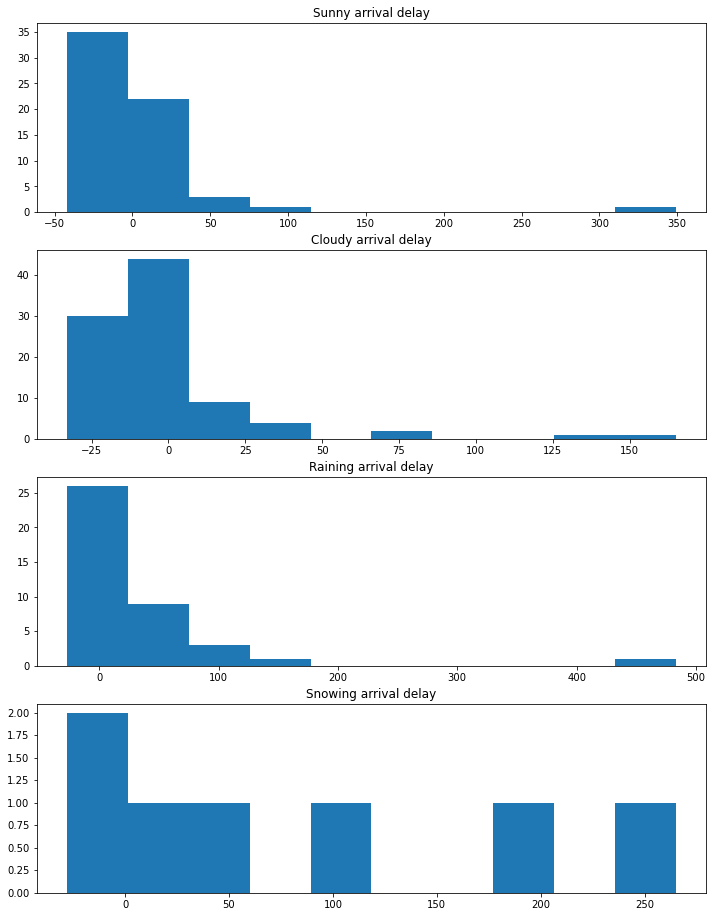

In [35]:
plt.figure(figsize=(12,16))

plt.subplot(4,1,1)
plt.hist(weather_sample.loc[weather_sample['sunny'] == 1, 'arr_delay'])
plt.title('Sunny arrival delay')

plt.subplot(4,1,2)
plt.hist(weather_sample.loc[weather_sample['cloudy'] == 1, 'arr_delay'])
plt.title('Cloudy arrival delay')

plt.subplot(4,1,3)
plt.hist(weather_sample.loc[weather_sample['raining'] == 1, 'arr_delay'])
plt.title('Raining arrival delay')

plt.subplot(4,1,4)
plt.hist(weather_sample.loc[weather_sample['snowing'] == 1, 'arr_delay'])
plt.title('Snowing arrival delay')

- Out of API calls (max 500 per day). Makes it very tough to answer this question with only 500 calls per day.
- Sunny and rainy days appear to have the same distribution (hard to say with this many samples)
- Clouds do not appear to have an effect on delays
- Sunny days have lower delays
- snowing days have random distributions of delays

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [36]:
flights_sample_minute_dep_taxi = flights_sample.groupby(by=flights_sample['dep_time']).mean()[['taxi_out']]
flights_sample_minute_dep_flights = flights_sample.groupby(by=flights_sample['dep_time']).count()[['flights']]

flights_sample_minute_arr_taxi = flights_sample.groupby(by=flights_sample['arr_time']).mean()[['taxi_in']]
flights_sample_minute_arr_flights = flights_sample.groupby(by=flights_sample['arr_time']).count()[['flights']]

flights_sample_minute_dep = pd.concat([flights_sample_minute_dep_taxi, flights_sample_minute_dep_flights], axis=1)#.reset_index()
flights_sample_minute_arr = pd.concat([flights_sample_minute_arr_taxi, flights_sample_minute_arr_flights], axis=1)#.reset_index()

flights_sample_minute_dep.reset_index(inplace=True)
flights_sample_minute_arr.reset_index(inplace=True)

flights_sample_minute_dep['dep_time'] = flights_sample_minute_dep['dep_time'].astype(int).astype(str)#first int to remove decimal, then string to manioulate into 4 digits for datetime conversion
flights_sample_minute_arr['arr_time'] = flights_sample_minute_arr['arr_time'].astype(int).astype(str)#pandas uses 00:01 - 23:99 as timeframes



for row in range(len(flights_sample_minute_dep)):
    if flights_sample_minute_dep['dep_time'][row] == '2400':
        flights_sample_minute_dep.iloc[row, 0] = '00:00'
        
    elif len(flights_sample_minute_dep['dep_time'][row]) == 1:
        flights_sample_minute_dep.iloc[row, 0] = '00:0' + flights_sample_minute_dep['dep_time'][row]
        
    elif len(flights_sample_minute_dep['dep_time'][row]) == 2:
        flights_sample_minute_dep.iloc[row, 0] = '00:' + flights_sample_minute_dep['dep_time'][row]
        
    elif len(flights_sample_minute_dep['dep_time'][row]) == 3:
        flights_sample_minute_dep.iloc[row, 0] = '0' + flights_sample_minute_dep['dep_time'][row][0] + ':' + flights_sample_minute_dep['dep_time'][row][1:]
        
    elif len(flights_sample_minute_dep['dep_time'][row]) == 4:
        flights_sample_minute_dep.iloc[row, 0] = flights_sample_minute_dep['dep_time'][row][0:2] + ':' + flights_sample_minute_dep['dep_time'][row][2:]
        
for row in range(len(flights_sample_minute_arr)):
    if flights_sample_minute_arr['arr_time'][row] == '2400':
        flights_sample_minute_arr.iloc[row, 0] = '00:00'
        
    elif len(flights_sample_minute_arr['arr_time'][row]) == 1:
        flights_sample_minute_arr.iloc[row, 0] = '00:0' + flights_sample_minute_arr['arr_time'][row]
        
    elif len(flights_sample_minute_arr['arr_time'][row]) == 2:
        flights_sample_minute_arr.iloc[row, 0] = '00:' + flights_sample_minute_arr['arr_time'][row]
        
    elif len(flights_sample_minute_arr['arr_time'][row]) == 3:
        flights_sample_minute_arr.iloc[row, 0] = '0' + flights_sample_minute_arr['arr_time'][row][0] + ':' + flights_sample_minute_arr['arr_time'][row][1:]
        
    elif len(flights_sample_minute_arr['arr_time'][row]) == 4:
        flights_sample_minute_arr.iloc[row, 0] = flights_sample_minute_arr['arr_time'][row][0:2] + ':' + flights_sample_minute_arr['arr_time'][row][2:]
        
        
        
flights_sample_minute_dep['dep_time'] = pd.to_datetime(flights_sample_minute_dep['dep_time'], format='%H:%M')
flights_sample_minute_arr['arr_time'] = pd.to_datetime(flights_sample_minute_arr['arr_time'], format='%H:%M')


flights_sample_hourly_dep = flights_sample_minute_dep.groupby(by=flights_sample_minute_dep['dep_time'].dt.hour).mean()
flights_sample_hourly_arr = flights_sample_minute_arr.groupby(by=flights_sample_minute_arr['arr_time'].dt.hour).mean()

flights_sample_hourly_taxi_flights = pd.DataFrame({'Avg Flights':((flights_sample_hourly_dep['flights'] + flights_sample_hourly_arr['flights'])/2), 
                                                   'Avg Taxi Times':((flights_sample_hourly_dep['taxi_out'] + flights_sample_hourly_arr['taxi_in'])/2)
                                                  })

Text(0.5, 1.0, 'Avg Hourly Taxi Times')

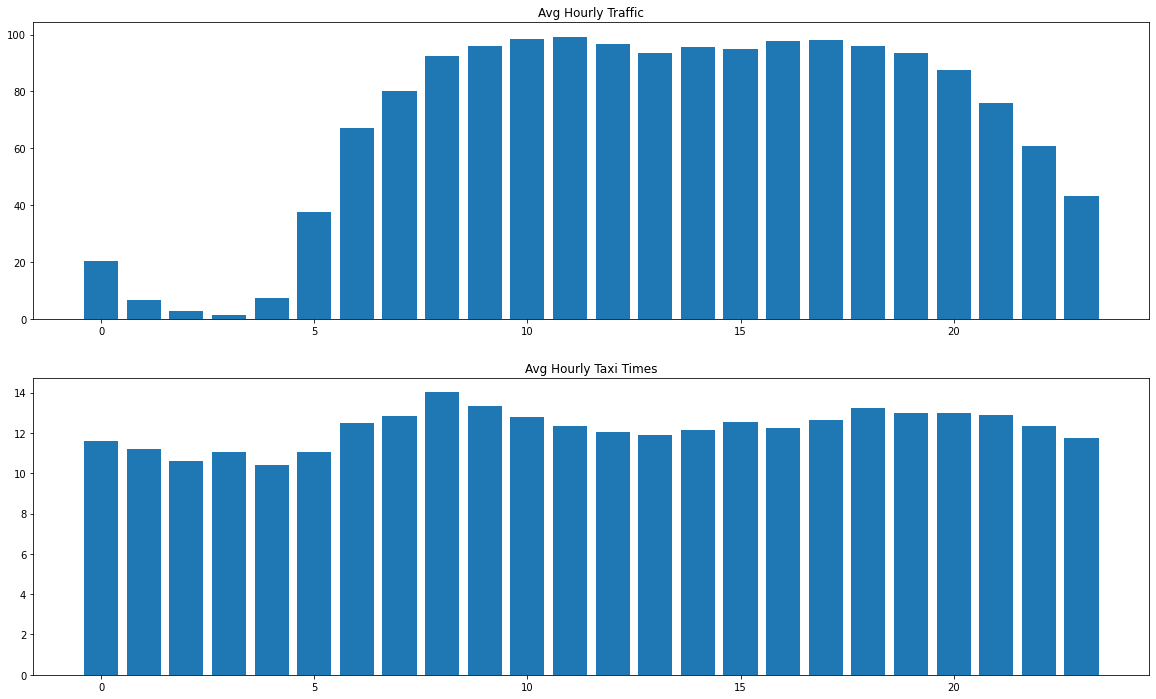

In [37]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
plt.bar(flights_sample_hourly_taxi_flights.index, flights_sample_hourly_taxi_flights['Avg Flights'])
plt.title('Avg Hourly Traffic')

plt.subplot(2,1,2)
plt.bar(flights_sample_hourly_taxi_flights.index, flights_sample_hourly_taxi_flights['Avg Taxi Times'])
plt.title('Avg Hourly Taxi Times')

Text(0, 0.5, 'AVG Taxi Times')

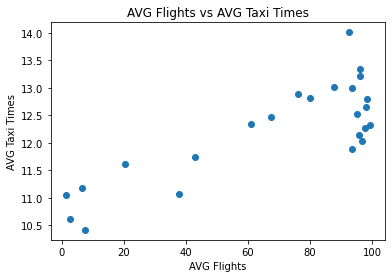

In [38]:
plt.scatter(flights_sample_hourly_taxi_flights['Avg Flights'], flights_sample_hourly_taxi_flights['Avg Taxi Times'])
plt.title('AVG Flights vs AVG Taxi Times')
plt.xlabel('AVG Flights')
plt.ylabel('AVG Taxi Times')

##### Higher traffic is positively correlated with taxi times. More traffic means longer taxi times
- increase/decrease in flight numbers match taxi times
- distributions are very similar
- scatter plot trends upwards with decent clustering

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [39]:
flights_sample

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-05-22,AA,AA,AA,1146,AA,N921AN,1146,11433,DTW,"Detroit, MI",11298,DFW,"Dallas/Fort Worth, TX",1140,1152.0,12.0,18.0,1210.0,1339.0,16.0,1333,1355.0,22.0,0,NaN,0,N,173.0,183.0,149.0,1,986,6.0,0.0,10.0,0.0,6.0
1,2018-08-28,AA,AA,AA,1227,AA,N988NN,1227,11057,CLT,"Charlotte, NC",10821,BWI,"Baltimore, MD",800,757.0,-3.0,26.0,823.0,919.0,5.0,929,924.0,-5.0,0,NaN,0,N,89.0,87.0,56.0,1,361,NaN,NaN,NaN,NaN,NaN
2,2018-01-14,AA,AA,AA,1513,AA,N962AN,1513,11298,DFW,"Dallas/Fort Worth, TX",11109,COS,"Colorado Springs, CO",1447,1450.0,3.0,15.0,1505.0,1543.0,6.0,1544,1549.0,5.0,0,NaN,0,N,117.0,119.0,98.0,1,592,NaN,NaN,NaN,NaN,NaN
3,2018-02-20,AA,AA,AA,2460,AA,N933AM,2460,11298,DFW,"Dallas/Fort Worth, TX",12892,LAX,"Los Angeles, CA",1440,1440.0,0.0,21.0,1501.0,1551.0,4.0,1615,1555.0,-20.0,0,NaN,0,N,215.0,195.0,170.0,1,1235,NaN,NaN,NaN,NaN,NaN
4,2019-06-07,AA,AA,AA,1213,AA,N896NN,1213,13930,ORD,"Chicago, IL",14747,SEA,"Seattle, WA",1150,1153.0,3.0,23.0,1216.0,1402.0,13.0,1422,1415.0,-7.0,0,NaN,0,N,272.0,262.0,226.0,1,1721,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,2018-07-24,WN,WN,WN,1988,WN,N276WN,1988,10821,BWI,"Baltimore, MD",10529,BDL,"Hartford, CT",1300,NaN,NaN,NaN,NaN,NaN,NaN,1415,NaN,NaN,1,B,0,N,75.0,NaN,NaN,1,283,NaN,NaN,NaN,NaN,NaN
99992,2019-02-04,WN,WN,WN,1017,WN,N902WN,1017,14747,SEA,"Seattle, WA",11292,DEN,"Denver, CO",1430,1547.0,77.0,14.0,1601.0,1909.0,7.0,1805,1916.0,71.0,0,NaN,0,N,155.0,149.0,128.0,1,1024,15.0,0.0,0.0,0.0,56.0
99993,2019-11-21,WN,WN,WN,2331,WN,N7818L,2331,13891,ONT,"Ontario, CA",14107,PHX,"Phoenix, AZ",1510,1604.0,54.0,10.0,1614.0,1810.0,6.0,1720,1816.0,56.0,0,NaN,0,N,70.0,72.0,56.0,1,325,0.0,0.0,24.0,0.0,32.0
99994,2018-10-16,WN,WN,WN,1610,WN,N7732A,1610,15016,STL,"St. Louis, MO",12278,ICT,"Wichita, KS",1035,1037.0,2.0,6.0,1043.0,1151.0,4.0,1155,1155.0,0.0,0,NaN,0,N,80.0,78.0,68.0,1,392,NaN,NaN,NaN,NaN,NaN


#### **Task 6**: How many states cover 50% of US air traffic? 

In [40]:
or_state, dest_state = [], []
for row in range(len(flights_sample)):
    or_state.append(flights_sample.iloc[row, 10][-2:])
    dest_state.append(flights_sample.iloc[row, 13][-2:])

In [42]:
air_traffic_by_state = pd.DataFrame({'dep_state': or_state, 'dest_state': dest_state})
air_traffic_by_state['flights'] = 1
air_traffic_dep_state = air_traffic_by_state.groupby(by=['dep_state']).sum().sort_values(by=['flights'], ascending=False)
air_traffic_dep_state['Percentage'] = air_traffic_dep_state['flights']/air_traffic_dep_state.sum().values[0]
air_traffic_dep_state.reset_index(inplace=True)

cum_per_list = []
cum_per = 0

for row in range(len(air_traffic_dep_state)):
    cum_per += air_traffic_dep_state['Percentage'][row]
    cum_per_list.append(cum_per)
    
        
air_traffic_dep_state['Cum Percentage'] = cum_per_list
air_traffic_dep_state
air_traffic_dep_state.loc[air_traffic_dep_state['Cum Percentage'] >= 0.5].head()

,dep_state,flights,Percentage,Cum Percentage
7,CO,3989,0.039892,0.532541
8,PA,3006,0.030061,0.562603
9,DC,2959,0.029591,0.592194
10,MI,2911,0.029111,0.621305
11,WA,2779,0.027791,0.649096


##### 8 states cover 50% of all US air traffic

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [43]:
flights_durations = flights_sample[['dep_delay', 'distance', 'air_time']].dropna()
flights_durations['avg_speed'] = (flights_durations['distance'] / flights_durations['air_time']) * 60
flights_durations

,dep_delay,distance,air_time,avg_speed
0,12.0,986,149.0,397.046980
1,-3.0,361,56.0,386.785714
2,3.0,592,98.0,362.448980
3,0.0,1235,170.0,435.882353
4,3.0,1721,226.0,456.902655
...,...,...,...,...
99990,10.0,581,86.0,405.348837
99992,77.0,1024,128.0,480.000000
99993,54.0,325,56.0,348.214286
99994,2.0,392,68.0,345.882353


Text(0, 0.5, 'Avg Flight Speed')

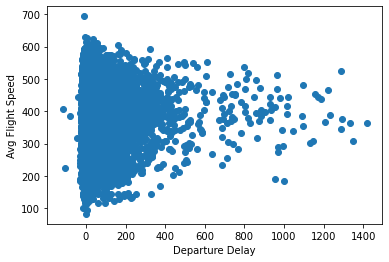

In [44]:
plt.scatter(flights_durations['dep_delay'], flights_durations['avg_speed'])
plt.xlabel('Departure Delay')
plt.ylabel('Avg Flight Speed')

Text(0, 0.5, 'Avg Flight Speed')

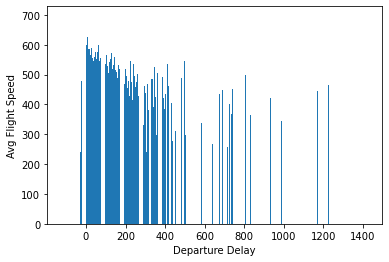

In [45]:
plt.bar(flights_durations['dep_delay'], flights_durations['avg_speed'])
plt.xlabel('Departure Delay')
plt.ylabel('Avg Flight Speed')

##### There is no correlation between avg flight speed and departure delay
- if anything, the trends show that delayed flights are actually flying slower

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [46]:
#short haul: hours <= 3
#med haul: 3 > hours <= 6
#long haul: hours > 6

flights_by_haul = flights_sample[['dep_time', 'air_time']].dropna().reset_index(drop=True)
flights_by_haul['dep_time'] = flights_by_haul['dep_time'].astype(int).astype(str)
flights_by_haul

,dep_time,air_time
0,1152,149.0
1,757,56.0
2,1450,98.0
3,1440,170.0
4,1153,226.0
...,...,...
98050,2305,86.0
98051,1547,128.0
98052,1604,56.0
98053,1037,68.0


In [47]:
for row in range(len(flights_by_haul)):
    if flights_by_haul['dep_time'][row] == '2400':
        flights_by_haul.iloc[row, 0] = '00:00'
        
    elif len(flights_by_haul['dep_time'][row]) == 1:
        flights_by_haul.iloc[row, 0] = '00:0' + flights_by_haul['dep_time'][row]
        
    elif len(flights_by_haul['dep_time'][row]) == 2:
        flights_by_haul.iloc[row, 0] = '00:' + flights_by_haul['dep_time'][row]
        
    elif len(flights_by_haul['dep_time'][row]) == 3:
        flights_by_haul.iloc[row, 0] = '0' + flights_by_haul['dep_time'][row][0] + ':' + flights_by_haul['dep_time'][row][1:]
        
    else:
        flights_by_haul.iloc[row, 0] = flights_by_haul['dep_time'][row][0:2] + ':' + flights_by_haul['dep_time'][row][2:]
        
flights_by_haul

,dep_time,air_time
0,11:52,149.0
1,07:57,56.0
2,14:50,98.0
3,14:40,170.0
4,11:53,226.0
...,...,...
98050,23:05,86.0
98051,15:47,128.0
98052,16:04,56.0
98053,10:37,68.0


In [580]:
flights_by_haul['dep_time'] = pd.to_datetime(flights_by_haul['dep_time'], format='%H:%M')
flights_by_haul

,dep_time,air_time
0,1900-01-01 11:52:00,149.0
1,1900-01-01 07:57:00,56.0
2,1900-01-01 14:50:00,98.0
3,1900-01-01 14:40:00,170.0
4,1900-01-01 11:53:00,226.0
...,...,...
98050,1900-01-01 23:05:00,86.0
98051,1900-01-01 15:47:00,128.0
98052,1900-01-01 16:04:00,56.0
98053,1900-01-01 10:37:00,68.0


In [581]:
haul_type = []

for row in range(len(flights_by_haul)):
    if flights_by_haul['air_time'][row] / 60 <= 3:
        haul_type.append('Short')
    
    elif flights_by_haul['air_time'][row] / 60 > 3 and flights_by_haul['air_time'][row] / 60 <= 6:
        haul_type.append('Medium')
    
    else:
        haul_type.append('Long')

In [582]:
flights_by_haul['haul'] = haul_type

In [776]:
flights_by_haul_hourly = flights_by_haul.groupby(by=[flights_by_haul['dep_time'].dt.hour, flights_by_haul['haul']])['haul'].count().unstack()

In [777]:
flights_by_haul_hourly = flights_by_haul_hourly.loc[((flights_by_haul_hourly['Long'] == flights_by_haul_hourly['Long'].max()) |
                                                     (flights_by_haul_hourly['Medium'] == flights_by_haul_hourly['Medium'].max()) |
                                                     (flights_by_haul_hourly['Short'] == flights_by_haul_hourly['Short'].max()))]



In [788]:
flights_by_haul_hourly

haul,Long,Medium,Short
dep_time,,,
8,20.0,966.0,5192.0
9,43.0,794.0,4966.0
17,35.0,706.0,5387.0


- Long haul flights mostly depart from 9-10am
- Medium haul flights mostly depart from 8-9am
- Short haul flights mostly depart from 5-6pm

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?